Netflix Data Analysis

Importing 'pandas' library and
uploading the dataset "netflix data.csv"

In [50]:
import pandas as pd

df = pd.read_csv("netflix data.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Basic Dataset Info

In [23]:
df.info()
# Data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [24]:
df.shape
# Rows and columns

(5850, 15)

In [26]:
df.columns
# Column names

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [27]:
df.describe()
# Numerical summary

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


Checking for Missing Values

In [30]:
df.isnull().sum()
#check how many missing (null) values are present in each column of the dataset

,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2619
runtime,0
genres,0
production_countries,0
seasons,3744


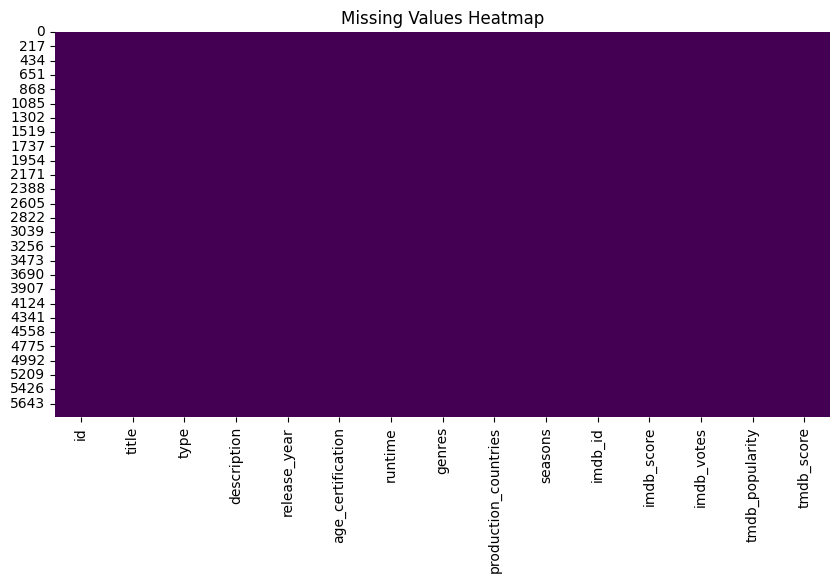

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()
#visualizing missing values

Handling Missing Data or Duplicate values

In [55]:
df.duplicated().sum()       # Check duplicates

np.int64(0)

There are no duplicate values.
Now for Missing values-

In [59]:
# Drop rows where 'ID' or 'Title' is missing
df = df.dropna(subset=['id', 'title'])

# For all other columns, replace missing values with 'Unknown'
df = df.fillna('Unknown')



In [60]:
# Check again to confirm all missing values are handled
df.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


Cross checking the datset again

In [61]:
print("Rows after cleaning:", len(df))
print("Missing values per column:")
print(df.isnull().sum())


Rows after cleaning: 5849
Missing values per column:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


Understand Categorical Data

In [71]:
df['type'].value_counts()

,count
type,
MOVIE,3743
SHOW,2106


In [72]:
df['age_certification'].value_counts()

,count
age_certification,
Unknown,2618
TV-MA,883
R,556
TV-14,474
PG-13,451
PG,233
TV-PG,188
G,124
TV-Y7,120


Data Visualization

Importing Libraries

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2742048672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


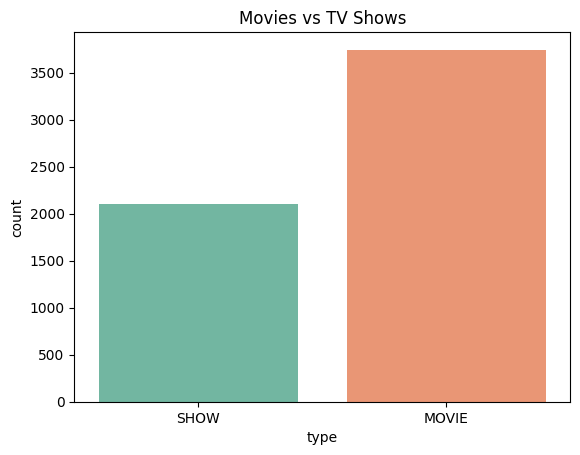

In [83]:
#Distribution of content type
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Movies vs TV Shows')
plt.show()

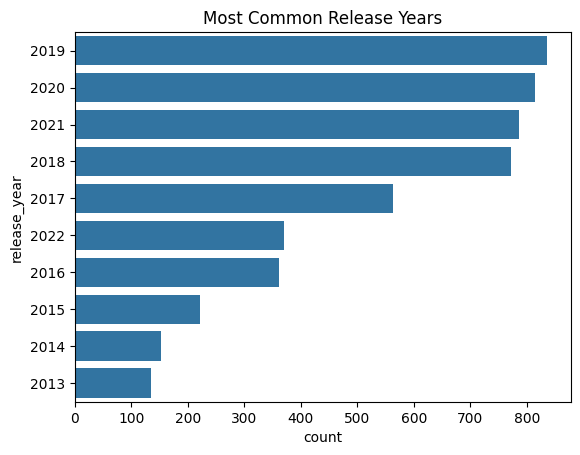

In [92]:
#Trend over years
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
sns.countplot(y='release_year', data=df, order=df['release_year'].value_counts().index[:10])
plt.title('Most Common Release Years')
plt.show()

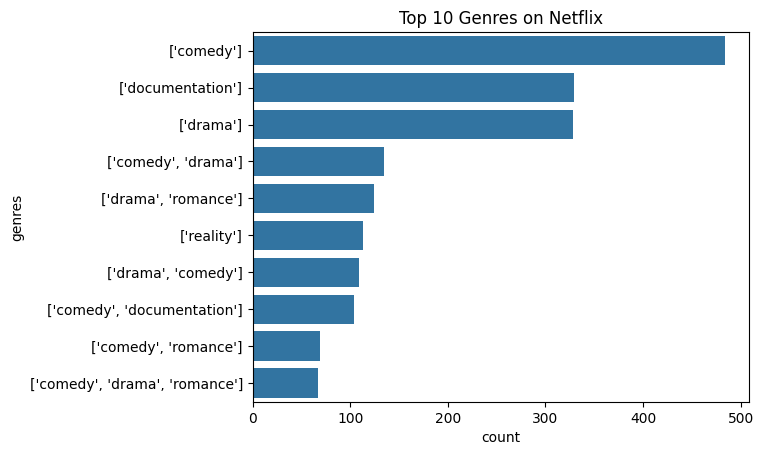

In [94]:
#Top 10 Genres
sns.countplot(y='genres', data=df, order=df['genres'].value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.show()

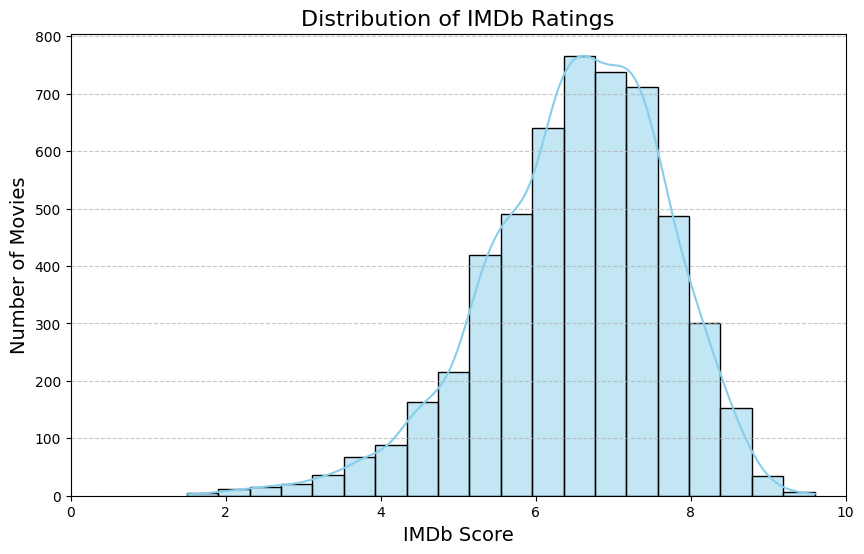

In [101]:
# Ensure all values are numeric; convert invalid parsing to NaN
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')

# Drop NaN values for plotting
imdb_scores = df['imdb_score'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(imdb_scores, bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of IMDb Ratings', fontsize=16)
plt.xlabel('IMDb Score', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [104]:
# Standardize column names
df.columns = df.columns.str.strip()             # Remove leading/trailing spaces
df.columns = df.columns.str.lower()             # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')   # Replace spaces with underscores
df.columns = df.columns.str.replace(r'[^0-9a-zA-Z_]', '', regex=True)  # Remove special characters

# Check the new column names
print(df.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [106]:
#saving the cleaned data
df.to_csv("netflix_cleaned.csv", index=False)
from google.colab import files
files.download("netflix_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>